In [ ]:
#DATASET1

In [12]:
import numpy as np
import pandas as pd

In [24]:
data=pd.read_excel('dataset1.xlsx')


In [14]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         99995 non-null   object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      99996 non-null   object
 5   Origin             99996 non-null   object
 6   Dest               99999 non-null   object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [10]:
data.shape

(100000, 9)

In [ ]:
Use a heatmap to show the relationship between "DayOfWeek" and "Month" with the number of delayed flights. What insights can you derive?


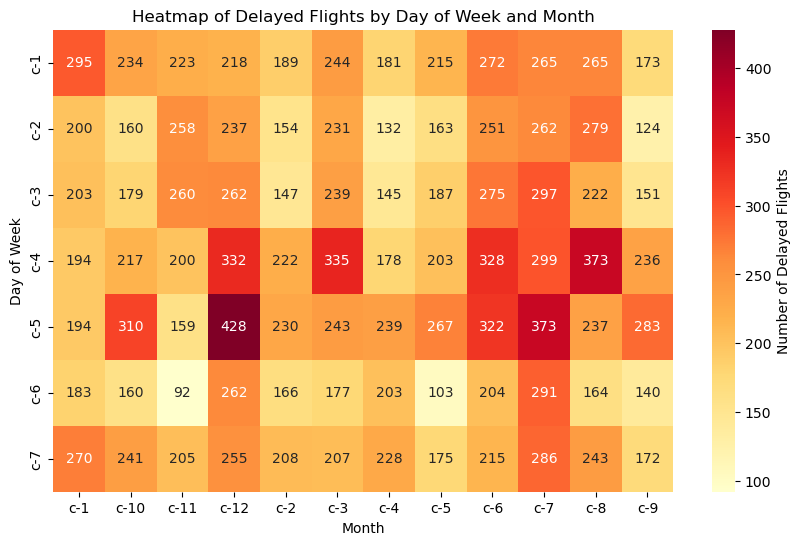

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = ''  
dataset = pd.read_excel('dataset1.xlsx')

delayed_flights = dataset[dataset['dep_delayed_15min'] == 'Y']


delay_counts = delayed_flights.pivot_table(index='DayOfWeek', columns='Month', aggfunc='size', fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(delay_counts, annot=True, fmt="d", cmap="YlOrRd", cbar_kws={'label': 'Number of Delayed Flights'})
plt.title('Heatmap of Delayed Flights by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()


In [ ]:
How many unique "Origin" and "Dest" airports are present in the dataset?



In [29]:

unique_origins = dataset['Origin'].nunique()
unique_destinations = dataset['Dest'].nunique()

print(f"Number of unique Origin airports: {unique_origins}")
print(f"Number of unique Destination airports: {unique_destinations}")


Number of unique Origin airports: 289
Number of unique Destination airports: 289


In [ ]:
# Analyze the frequency distribution of flights across different "DayOfWeek." Which day of the week has the highest number of flights?

C:\Users\asnaa\AppData\Local\Temp\ipykernel_15424\1286182240.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="coolwarm")


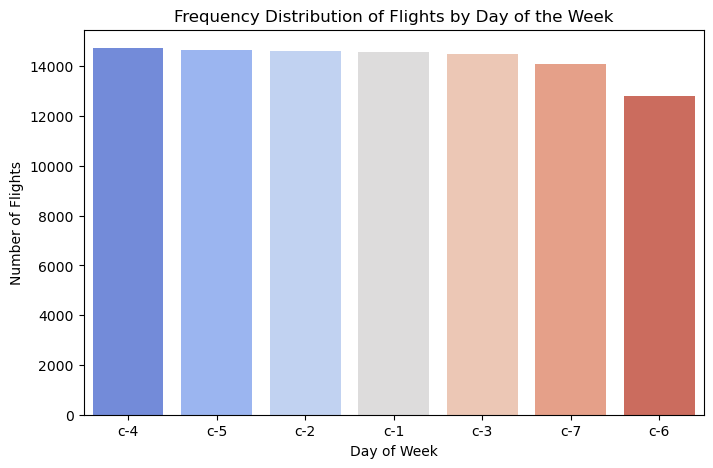

The day with the highest number of flights is c-4 with 14736 flights.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'dataset1.xlsx'  
dataset = pd.read_excel(file_path)

day_counts = dataset['DayOfWeek'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="coolwarm")
plt.title('Frequency Distribution of Flights by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.show()


top_day = day_counts.idxmax()
top_day_count = day_counts.max()
print(f"The day with the highest number of flights is {top_day} with {top_day_count} flights.")


In [ ]:
Is there any relationship between the "Distance" and whether a flight is delayed? Use correlation or scatter plots to support your analysis.


C:\Users\asnaa\AppData\Local\Temp\ipykernel_15424\2497332793.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="viridis")


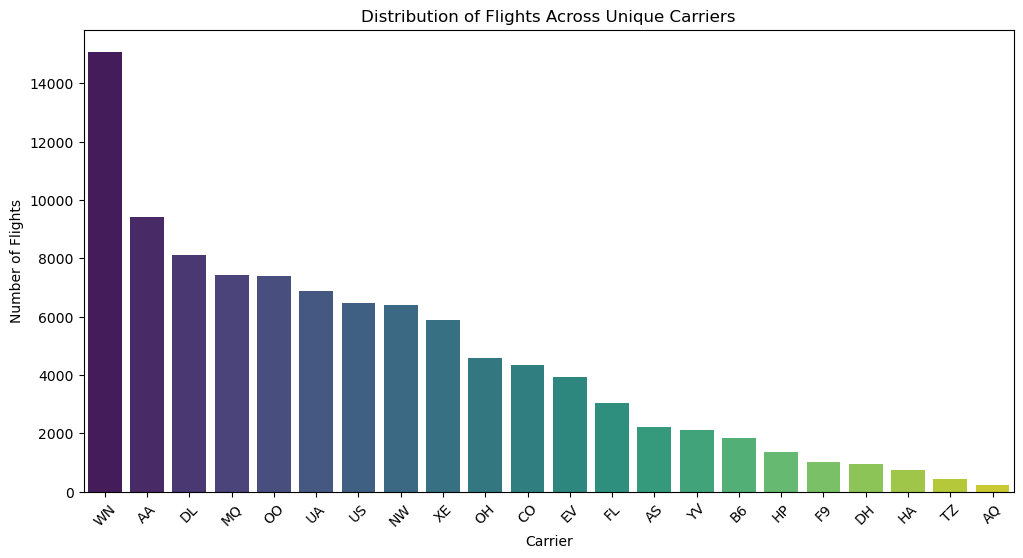

The carrier with the highest number of flights is WN with 15080 flights.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'dataset1.xlsx' 
dataset = pd.read_excel('dataset1.xlsx')
carrier_counts = dataset['UniqueCarrier'].value_counts()


top_carrier = carrier_counts.idxmax()
top_carrier_count = carrier_counts.max()


plt.figure(figsize=(12, 6))
sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="viridis")
plt.title('Distribution of Flights Across Unique Carriers')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


print(f"The carrier with the highest number of flights is {top_carrier} with {top_carrier_count} flights.")


In [ ]:
Is there any relationship between the "Distance" and whether a flight is delayed? Use correlation or scatter plots to support your analysis.


Correlation between Distance and Delay: -0.002734296684576709


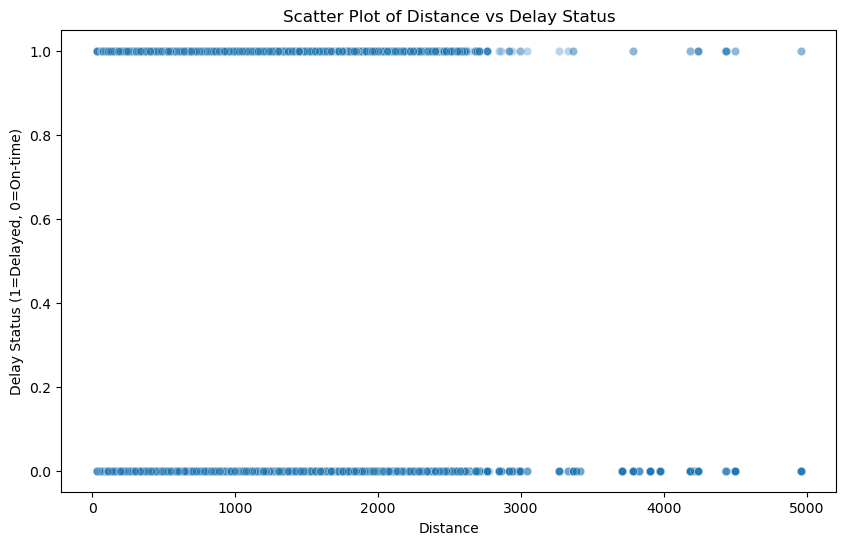

In [30]:
import numpy as np


dataset['DelayBinary'] = dataset['dep_delayed_15min'].apply(lambda x: 1 if x == 'Y' else 0)


distance_delay_correlation = dataset[['Distance', 'DelayBinary']].corr().iloc[0, 1]
print(f"Correlation between Distance and Delay: {distance_delay_correlation}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='DelayBinary', data=dataset, alpha=0.3)
plt.title('Scatter Plot of Distance vs Delay Status')
plt.xlabel('Distance')
plt.ylabel('Delay Status (1=Delayed, 0=On-time)')
plt.show()


In [ ]:
Group the data by time intervals (e.g., morning, afternoon, evening, night) based on "DepTime." Analyze if certain times of the day have more frequent delays

C:\Users\asnaa\AppData\Local\Temp\ipykernel_15424\1891496602.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_by_time.index, y=delay_by_time.values, palette="magma")


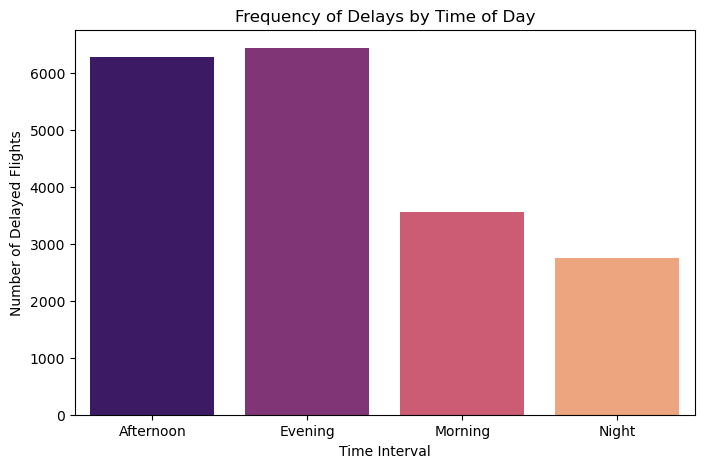

In [31]:

def time_interval(dep_time):
    if 500 <= dep_time < 1200:
        return 'Morning'
    elif 1200 <= dep_time < 1700:
        return 'Afternoon'
    elif 1700 <= dep_time < 2100:
        return 'Evening'
    else:
        return 'Night'


dataset['TimeInterval'] = dataset['DepTime'].apply(time_interval)


delay_by_time = dataset[dataset['dep_delayed_15min'] == 'Y'].groupby('TimeInterval').size()


plt.figure(figsize=(8, 5))
sns.barplot(x=delay_by_time.index, y=delay_by_time.values, palette="magma")
plt.title('Frequency of Delays by Time of Day')
plt.xlabel('Time Interval')
plt.ylabel('Number of Delayed Flights')
plt.show()


In [ ]:
Investigate whether there is a pattern in departure times for flights that were delayed ("dep_delayed_15min" = 'Y') compared to those that were not.


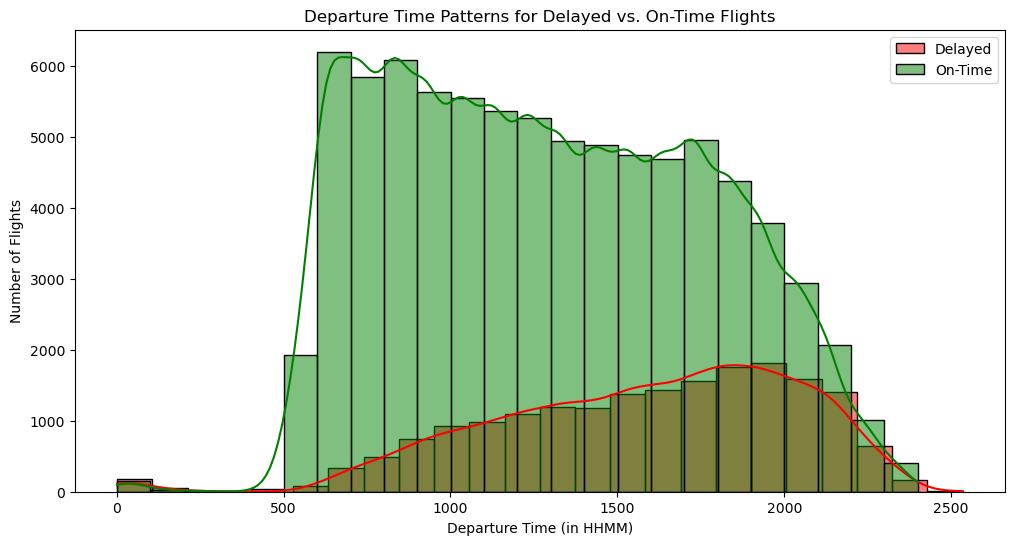

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'dataset1.xlsx'  
dataset = pd.read_excel('dataset1.xlsx')


delayed_flights = dataset[dataset['dep_delayed_15min'] == 'Y']
on_time_flights = dataset[dataset['dep_delayed_15min'] == 'N']


plt.figure(figsize=(12, 6))
sns.histplot(delayed_flights['DepTime'], color='red', label='Delayed', kde=True, bins=24, alpha=0.5)
sns.histplot(on_time_flights['DepTime'], color='green', label='On-Time', kde=True, bins=24, alpha=0.5)
plt.title('Departure Time Patterns for Delayed vs. On-Time Flights')
plt.xlabel('Departure Time (in HHMM)')
plt.ylabel('Number of Flights')
plt.legend()
plt.show()



In [ ]:
Create a bar chart to show the number of flights per carrier. What patterns or trends do you notice?


C:\Users\asnaa\AppData\Local\Temp\ipykernel_15424\1135818028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="viridis")


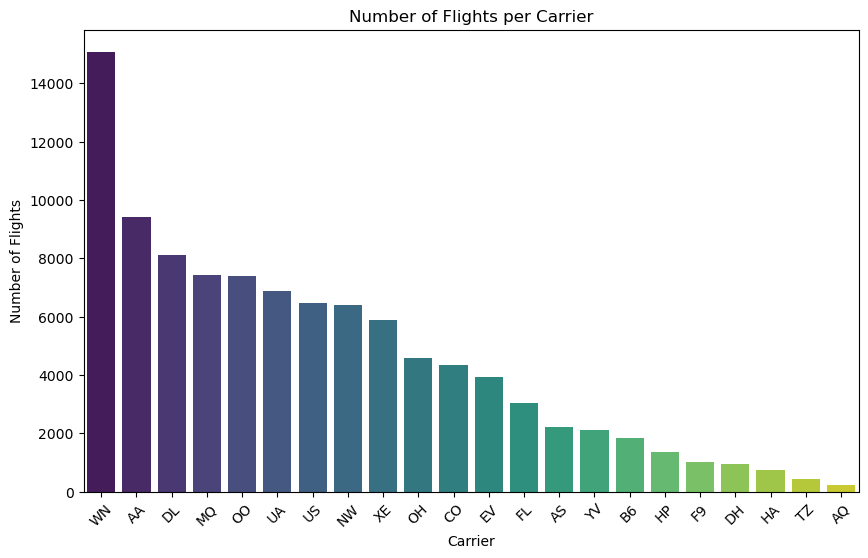

The carrier with the highest number of flights is WN with 15080 flights.


In [34]:

carrier_counts = dataset['UniqueCarrier'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="viridis")
plt.title('Number of Flights per Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


top_carrier = carrier_counts.idxmax()
top_carrier_count = carrier_counts.max()
print(f"The carrier with the highest number of flights is {top_carrier} with {top_carrier_count} flights.") 


In [ ]:
Calculate the mean, median, and standard deviation for the "DepTime" column. What insights can you draw from these measures?


In [35]:
import pandas as pd
file_path = 'dataset1.xlsx'  
dataset = pd.read_excel('dataset1.xlsx')


dep_time_numeric = pd.to_numeric(dataset['DepTime'], errors='coerce').dropna()


mean_dep_time = dep_time_numeric.mean()
median_dep_time = dep_time_numeric.median()
std_dev_dep_time = dep_time_numeric.std()

print(f"Mean Departure Time: {mean_dep_time}")
print(f"Median Departure Time: {median_dep_time}")
print(f"Standard Deviation of Departure Time: {std_dev_dep_time}")


Mean Departure Time: 1341.52388
Median Departure Time: 1330.0
Standard Deviation of Departure Time: 476.3784446151376


In [ ]:
#DATASET2

In [36]:
import numpy as ap
import pandas as pd

In [43]:
data=pd.read_excel('Dataset2.xlsx')


In [51]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [45]:
from sklearn.impute import SimpleImputer


In [ ]:
data preprocessing

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


file_path = 'Dataset2.xlsx'
dataset = pd.read_excel('Dataset2.xlsx')



X = dataset.drop(columns=['Class'])
y = dataset['Class']


imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
model selection and training

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)


models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Support Vector Machine': svm
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Model: Decision Tree
Accuracy: 0.8901946382666177
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       261
           1       1.00      1.00      1.00       117
           2       0.88      0.91      0.89       317
           3       0.88      0.88      0.88       671
           4       0.96      0.93      0.94       408
           5       0.93      0.92      0.92       413
           6       0.83      0.83      0.83       536

    accuracy                           0.89      2723
   macro avg       0.90      0.90      0.90      2723
weighted avg       0.89      0.89      0.89      2723

Confusion Matrix:
[[226   0  25   0   1   2   7]
 [  0 117   0   0   0   0   0]
 [ 25   0 287   0   4   0   1]
 [  2   0   0 591   4  12  62]
 [  4   0  13   4 378   0   9]
 [  2   0   0  20   0 379  12]
 [  7   0   1  59   8  15 446]]


Model: Random Forest
Accuracy: 0.9247153874403232
              precision    recall  f1-score   support

          

In [ ]:
Feature Analysics

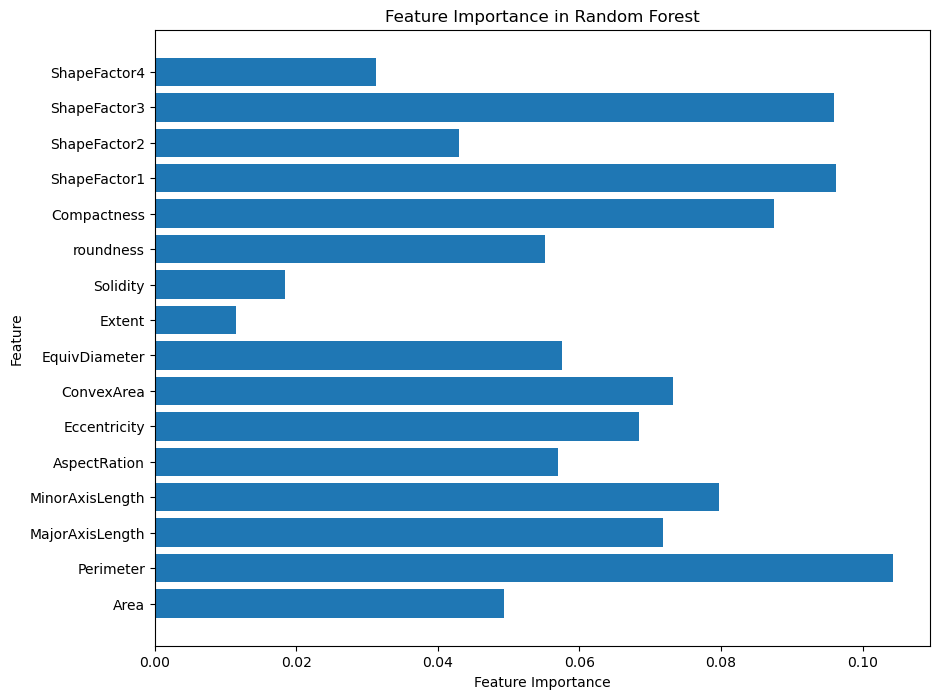

In [50]:
import matplotlib.pyplot as plt


random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_


plt.figure(figsize=(10, 8))
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


In [ ]:
Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy after Tuning:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
